In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_clean.csv")

In [3]:
data.head(1)

,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,1,1,0,0,0,-0.686567,0,2,0


In [137]:
X = data[['Age','Diabetes', '']]

Cluster Statistics:
    Cluster    gender        age  hypertension  heart_disease  \
0        -1  0.413793  33.275862      0.068966       0.000000   
1         0  0.516129  27.967742      0.000000       0.000000   
2         1  0.536585  50.536585      0.024390       0.073171   
3         2  0.687500  73.437500      0.125000       0.062500   
4         3  0.375000  13.875000      0.000000       0.062500   
5         4  0.562500  49.687500      0.000000       0.125000   
6         5  0.601695  50.567797      0.067797       0.000000   
7         6  0.676190  28.980952      0.019048       0.009524   
8         7  0.578947  11.256842      0.000000       0.000000   
9         8  0.708333  72.062500      0.145833       0.104167   
10        9  0.550000  55.400000      0.500000       0.150000   
11       10  0.590909  74.363636      0.181818       0.136364   

    smoking_history        bmi  HbA1c_level  blood_glucose_level  diabetes  \
0         -0.344828  25.384483     5.686207           12

/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


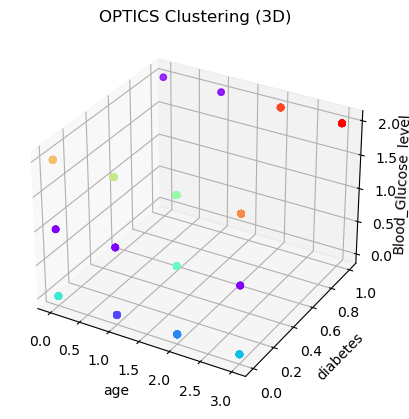

In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

min_samples = 15 # Minimum number of samples in a neighborhood to consider a core point
xi = 0.6 # Determines the minimum steepness on the reachability plot

optics = OPTICS(min_samples=min_samples, xi=xi)
cluster_labels = optics.fit_predict(X_scaled)

data['Cluster'] = cluster_labels
cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Age'], X['Diabetes'], X['glucose_discretized'], c=cluster_labels, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Diabetes')
ax.set_zlabel('Blood_Glucose_level',labelpad=-2, y=1.0, rotation=1)
ax.set_title('OPTICS Clustering (3D)')
plt.show()

In [213]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9153386063579527
